In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lmfit import Model
import plotly.express as px
import scipy.stats as stats
from tqdm.notebook import tqdm
from IPython.display import Image, Video

### FCC решетка
Я реализовал генерацию fcc-решетки. Визуализация представлена в файлах fcc.mp4 и fcc_top.mp4. Ниже кадр из визуализации, кадр с траекториями атмомов одной ячейки решетки и сами визуализации, полученные при помощи OVITO

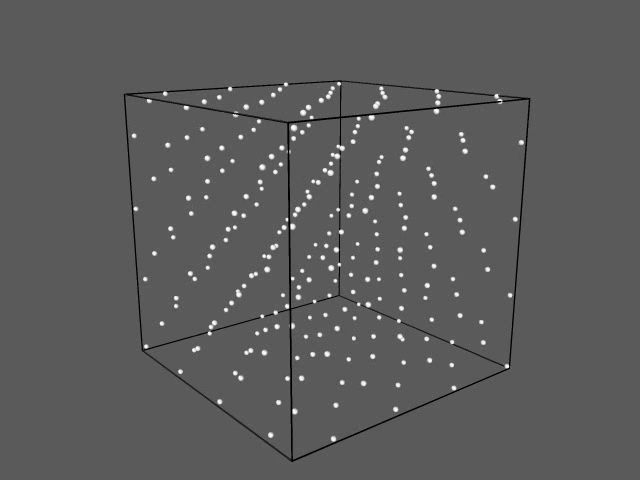

In [2]:
Image("fcc/fcc.png")

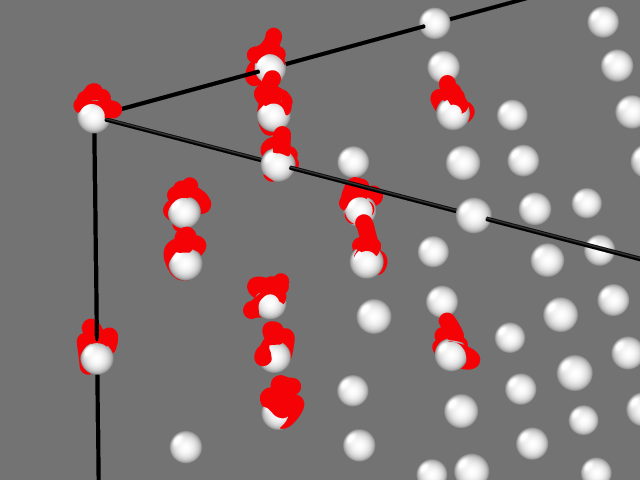

In [3]:
Image("fcc/fcc_one.png")

In [4]:
Video("fcc/fcc.mp4")

In [5]:
Video("fcc/fcc_top.mp4")

## RDF
Радиальные функции разпределения получены для: 
* твердого тела: $ N=4096 \quad T=1.5 \quad \rho=1.2 $ 
* жидкости: $N=4096 \quad T=1.0 \quad \rho=0.7$ 
* газа: $N=4096 \quad T=30.0 \quad \rho=0.7$ 

Можно увидеть, что функции имеют вид, совпадающий с теоретическим. Зависимости сняты для ограниченного числа молекул, поэтому не являются гладкими

### Твердое тело
RDF имеет пики на $ 1, \sqrt{2}, \sqrt{3} ...$ соответствующие положениям молекул в решетке и равна нулю между ними

In [56]:
df = pd.read_csv("rdf/fcc.dat", sep=' ', names= ['x','y','z','vx','vy','vz','1','2','3','4','5','6','7','8'])
del df['1'], df['2'], df['3'], df['4'], df['5'], df['6'], df['7'], df['8']

In [54]:
dr = 0.03
r = np.arange(0, 3.0, dr)
rho = 1.2
particles = 2048
cell = 11.950412657
g = np.zeros(len(r))
x = np.array(df['x'])
y = np.array(df['y'])
z = np.array(df['z'])
for n in tqdm(range(0,particles), desc="Points"):
    x0=x[n]
    y0=y[n]
    z0=z[n]
    rx = x0 - x
    ry = y0 - y
    rz = z0 - z
    rx -= np.rint(rx/cell)*cell
    ry -= np.rint(ry/cell)*cell
    rz -= np.rint(rz/cell)*cell
    rt = np.sqrt(rx*rx+ry*ry+rz*rz)
    rt = np.trunc(rt/dr)
    for j in rt:
        if j<len(g) and j>1:
            rc = j*dr
            g[int(j)]+=1/(4*rho*np.pi*rc*rc*dr)

g = g/particles

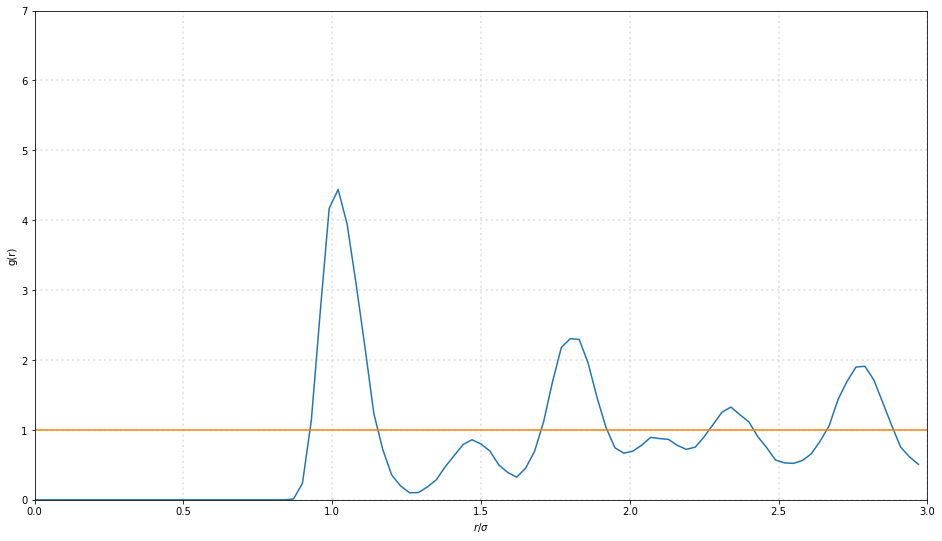

In [55]:
plt.plot(r, g)
plt.plot(np.arange(0, 4, 1), np.ones(4))
plt.rcParams['figure.figsize'] = [16, 9]
plt.grid(b=True, color='Grey', alpha=0.2, linestyle=':', linewidth=2)
plt.xlabel(r"$r/\sigma$")
plt.ylabel("g(r)")
plt.ylim(0,7)
plt.xlim(0,3)
plt.show()

### Жидкость
RDF имеет некоторые пики, соответствующие группам молекул в жидкости и достаточно быстро выходит на единицу

In [44]:
df = pd.read_csv("rdf/liquid.dat", sep=' ', names= ['x','y','z','vx','vy','vz','1','2','3','4','5','6','7','8'])
del df['1'], df['2'], df['3'], df['4'], df['5'], df['6'], df['7'], df['8']

In [31]:
dr = 0.04
r = np.arange(0, 4.0, dr)
rho = 0.7
#particles = 1024
#cell = 5.675933648*2
particles = 4096
cell = 18.019966087
g = np.zeros(len(r))
x = np.array(df['x'])
y = np.array(df['y'])
z = np.array(df['z'])
for n in tqdm(range(0,particles), desc="Points"):
    x0=x[n]
    y0=y[n]
    z0=z[n]
    rx = x0 - x
    ry = y0 - y
    rz = z0 - z
    rx -= np.rint(rx/cell)*cell
    ry -= np.rint(ry/cell)*cell
    rz -= np.rint(rz/cell)*cell
    rt = np.sqrt(rx*rx+ry*ry+rz*rz)
    rt = np.trunc(rt/dr)
    for j in rt:
        if j<len(g) and j>1:
            rc = j*dr
            g[int(j)]+=1/(4*rho*np.pi*rc*rc*dr)

g = g/particles

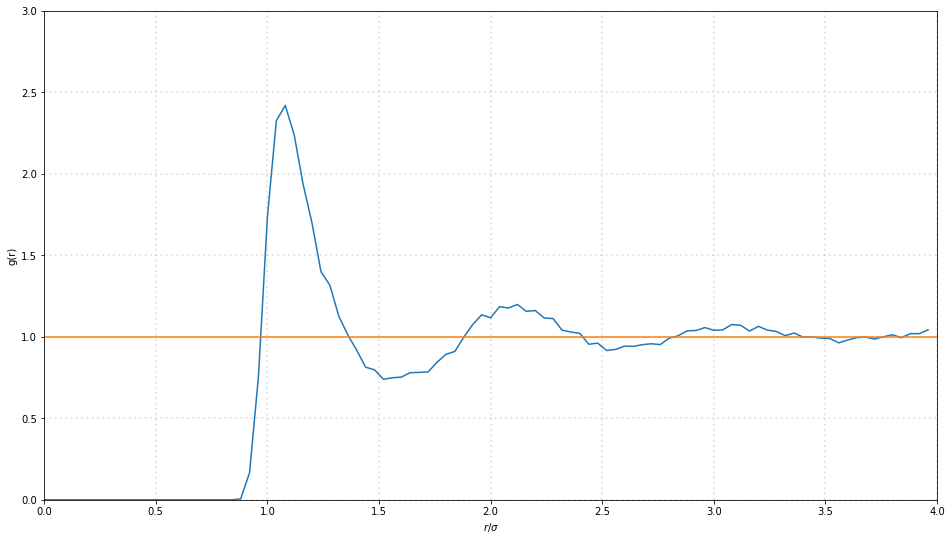

In [32]:
plt.plot(r, g)
plt.plot(np.arange(0, 7, 1), np.ones(7))
plt.rcParams['figure.figsize'] = [16, 9]
plt.grid(b=True, color='Grey', alpha=0.2, linestyle=':', linewidth=2)
plt.xlabel(r"$r/\sigma$")
plt.ylabel("g(r)")
plt.ylim(0,3)
plt.xlim(0,4)
plt.show()

### Газ
RDF имеет один пик на 1 и выходит на единицу с 2, что показывает отсутствие структур в газе

In [43]:
df = pd.read_csv("rdf/gas.dat", sep=' ', names= ['x','y','z','vx','vy','vz','1','2','3','4','5','6','7','8'])
del df['1'], df['2'], df['3'], df['4'], df['5'], df['6'], df['7'], df['8']

In [40]:
dr = 0.03
r = np.arange(0, 3.0, dr)
rho = 0.7
#particles = 1024
#cell = 5.675933648*2
particles = 4096
cell = 18.019966087
g = np.zeros(len(r))
x = np.array(df['x'])
y = np.array(df['y'])
z = np.array(df['z'])
for n in tqdm(range(0,particles), desc="Points"):
    x0=x[n]
    y0=y[n]
    z0=z[n]
    rx = x0 - x
    ry = y0 - y
    rz = z0 - z
    rx -= np.rint(rx/cell)*cell
    ry -= np.rint(ry/cell)*cell
    rz -= np.rint(rz/cell)*cell
    rt = np.sqrt(rx*rx+ry*ry+rz*rz)
    rt = np.trunc(rt/dr)
    for j in rt:
        if j<len(g) and j>1:
            rc = j*dr
            g[int(j)]+=1/(4*rho*np.pi*rc*rc*dr)

g = g/particles

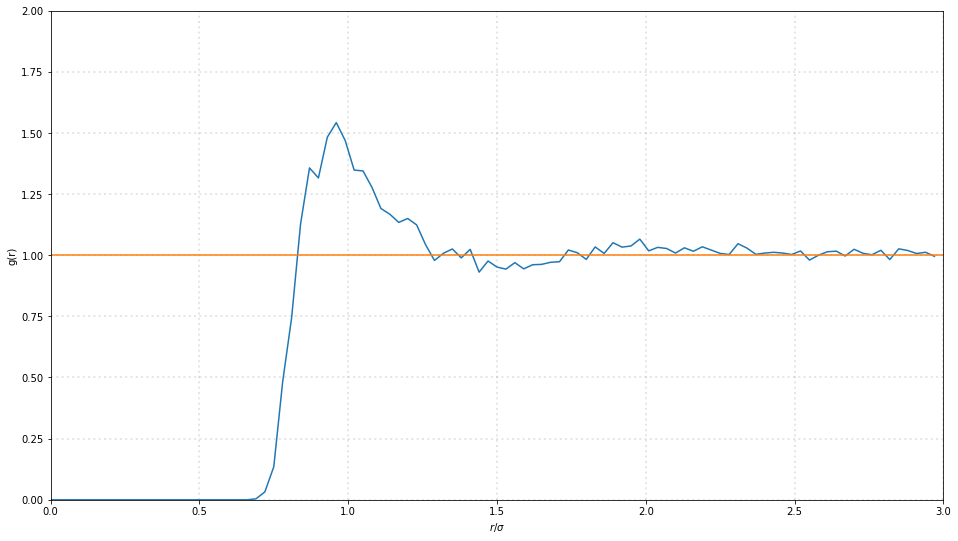

In [41]:
plt.plot(r, g)
plt.plot(np.arange(0, 4, 1), np.ones(4))
plt.rcParams['figure.figsize'] = [16, 9]
plt.grid(b=True, color='Grey', alpha=0.2, linestyle=':', linewidth=2)
plt.xlabel(r"$r/\sigma$")
plt.ylabel("g(r)")
plt.ylim(0,2)
plt.xlim(0,3)
plt.show()

## Критерий Линдемана
Для определения точки плавления можно воспользоваться критерием Линдемана. Если u - амлитуда вибрации атомов вокруг положения равновесия, то точкой плавления можно считать момент, когда это величина достигает определенного значения: $$ \frac{\sqrt{\langle u^{2} \rangle}}{a} = 0.1$$ где а - параметр решетки (расстояние до ближайшего атома).

Я рассчитал параметр Линдемана для fcc-решетки при плотности 1.0 и температурах 0.2-2.0. Параметр превышает значение 0.1 при температуре $$T \approx 1.35$$ Сравнивая результат с фазовой диаграммой, приложенной к заданию, можно увидеть, что эта точка лежит примерно на кривой кристализации, так же, как граница стабильности кристалла при изохорическом нагреве у авторов диаграммы. Отсутствие резкого скачка можно объяснить тем, что структура при нагреве проходит через область сосуществования твердой фазы и жидкой, и плавление происходит постепенно для некоторых атомов.

In [2]:
data = np.arange(2, 21, 1)
print(data)
names = ["melting/"+str(i)+".xyz" for i in data]
frames = 999
particles = 256
x = np.zeros((len(data), particles,frames))
y = np.zeros((len(data), particles,frames))
z = np.zeros((len(data), particles,frames))

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


In [3]:
for j in tqdm(range(0, len(data)), desc="File"):
    with open(names[j], "r") as file:
        for frame in tqdm(range(0,frames), desc="Frame", leave=False):
            try:
                n = int(file.readline())
            except:
                break
            file.readline()

            coord = []

            for i in range(0,n):
                line = file.readline()
                coord = [float(j) for j in line.split(" ")]

                x[j][i][frame] = coord[0]
                y[j][i][frame] = coord[1]

                z[j][i][frame] = coord[2]

In [4]:
dr = np.zeros((len(data), particles))

for dat in tqdm(range(0, len(data)), desc="File"):
    for i in tqdm(range(0,particles), desc="Frame", leave=False):
        dr[dat][i]=np.square((x[dat][i]- x[dat][i].mean())).mean()
        dr[dat][i]=np.square((y[dat][i]- y[dat][i].mean())).mean()
        dr[dat][i]=np.square((z[dat][i]- z[dat][i].mean())).mean()

In [5]:
a = 256**(1/3)/(4*2**0.5)
du = np.zeros(len(data))
for dat in range(0, len(data)):
    du[dat] = np.sqrt(dr[dat].mean())/a
#k, b = np.polyfit(data[0:12]/10, du[0:12], 1)

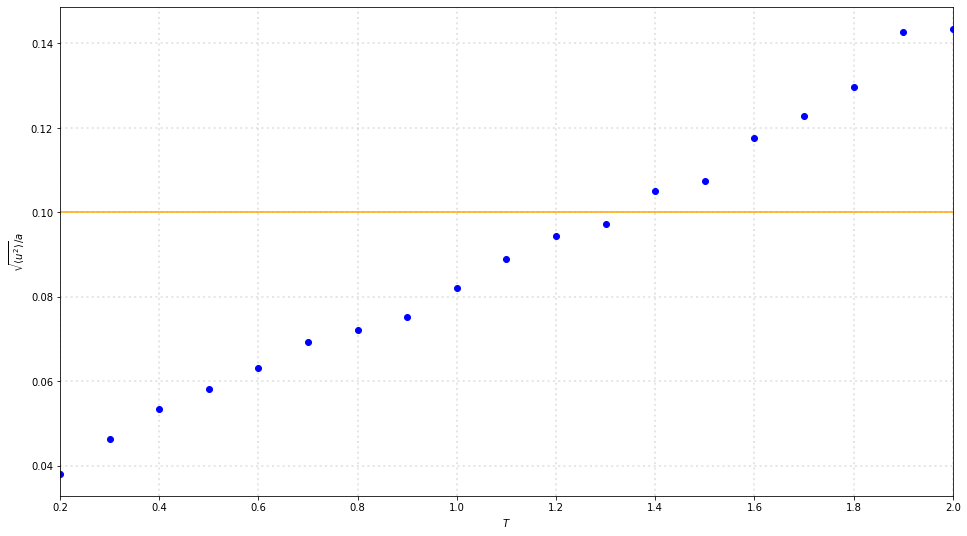

In [7]:
plt.plot(data/10, du, "bo")
plt.plot(data/10, np.full(len(data),0.1), color="orange")
plt.rcParams['figure.figsize'] = [16, 9]
plt.grid(b=True, color='Grey', alpha=0.2, linestyle=':', linewidth=2)
plt.xlabel(r"$T$")
plt.ylabel(r"$\sqrt{\langle u^{2}\rangle}/a$")
#plt.ylim(0,2)
plt.xlim(0.2,2)
plt.show()

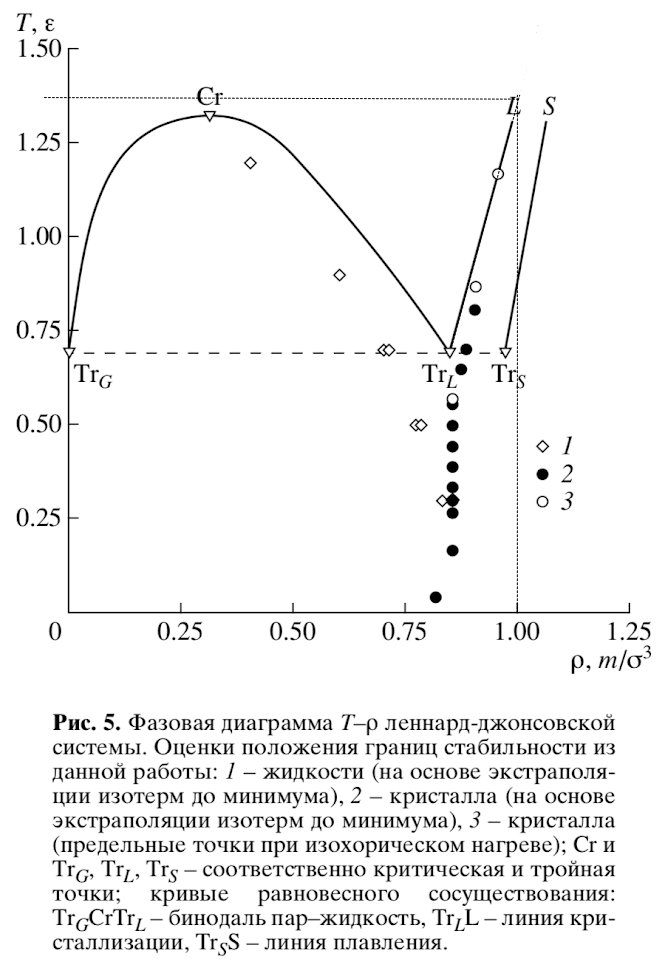

In [8]:
Image("melting/phase.png")